In [1]:
%matplotlib inline

sns.set_style('white')
sns.set_context('poster')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [2]:
# Get registration application data
res = requests.get('https://www.performance.service.gov.uk/data/register-to-vote/volumetrics?duration=30&collect=count%3Asum&group_by=value&period=day&filter_by=metricName%3Aage_band')
# res.json()['data']

In [3]:
def munge_reg_apps(res):
    """ Transorm JSON into DataFrame-compabible format. """
    
    apps = DataFrame()
    data = res.json()['data']
    
    for age_group in data:
        age_df = DataFrame(age_group['values'])
        age_df['age_group'] = age_group['value']
        apps = apps.append(age_df)
    
    apps[['_end_at', '_start_at']] = apps[['_end_at', '_start_at']].apply(pd.to_datetime)
    apps = apps.rename(columns={'_end_at': 'end_date', '_start_at': 'start_date', 'count:sum': 'total'})
    apps = apps.drop(labels=['_count'], axis=1)
    apps['age_group'] = apps.age_group.astype('category')

    return apps.reset_index(drop=True)

In [4]:
apps = munge_reg_apps(res)
apps.head()

,end_date,start_date,total,age_group
0,2016-05-09,2016-05-08,1.0,14-15
1,2016-05-10,2016-05-09,1.0,14-15
2,2016-05-11,2016-05-10,6.0,14-15
3,2016-05-12,2016-05-11,5.0,14-15
4,2016-05-13,2016-05-12,14.0,14-15


## Total registration apps by age group

In [5]:
apps.groupby('age_group').sum()

,total
age_group,
14-15,274.0
16-17,18795.0
18-24,464168.0
25-34,595593.0
35-44,345570.0
45-54,252017.0
55-64,140003.0
65-74,73127.0
> 75,28478.0


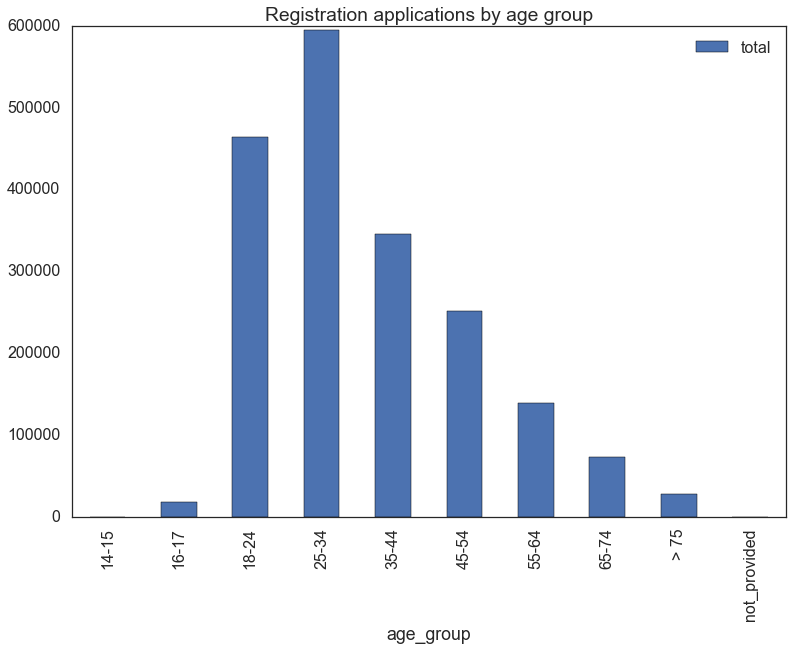

In [6]:
apps.groupby('age_group').sum().plot(kind='bar', title='Registration applications by age group');

In [7]:
apps.groupby('age_group')[['total']].describe().unstack()

/Users/Andrew/anaconda/envs/dev/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


total                                                                          
             count          mean           std     min       25%      50%       75%      max
age_group                                                                                   
14-15         30.0      9.133333      9.676610     1.0      4.00      6.5     11.50     53.0
16-17         30.0    626.500000    348.648499   170.0    392.75    564.5    742.75   1779.0
18-24         30.0  15472.266667  13798.404250  2654.0   7223.75  12832.5  17896.25  71954.0
25-34         30.0  19853.100000  15085.647555  4650.0  11656.50  17154.5  22850.75  74417.0
35-44         30.0  11519.000000   7231.651960  3086.0   8375.50  10727.0  12491.00  35754.0
45-54         30.0   8400.566667   4518.058407  2627.0   6014.50   7830.0   9717.50  23711.0
55-64         30.0   4666.766667   2181.722598  1483.0   3283.75   4538.5   5566.75  11664.0
65-74         30.0   2437.566667   1072.734138   698.0   1581.00   2496.5   2863.25   5045.0
> 75          30.0    949.266667    447.148585   279.0    539.00    922.0   1300.75   1985.0
not_provided  11.0      1.363636      0.504525     1.0       NaN      NaN       NaN      2.0

In [8]:
age_apps = apps.pivot(index='start_date', columns='age_group', values='total')
age_apps

age_group,14-15,16-17,18-24,25-34,35-44,45-54,55-64,65-74,> 75,not_provided
start_date,,,,,,,,,,
2016-05-08,1.0,170.0,2654.0,4650.0,3086.0,2627.0,1702.0,870.0,279.0,NaN
2016-05-09,1.0,385.0,5828.0,10337.0,7295.0,5921.0,3684.0,2108.0,773.0,NaN
2016-05-10,6.0,380.0,6431.0,11901.0,8780.0,7175.0,4283.0,2354.0,755.0,NaN
2016-05-11,5.0,520.0,7021.0,13265.0,10408.0,8798.0,5128.0,2720.0,877.0,1.0
2016-05-12,14.0,416.0,6607.0,12377.0,9641.0,8381.0,4706.0,2619.0,878.0,NaN
2016-05-13,4.0,465.0,7832.0,11259.0,8585.0,7423.0,4371.0,2420.0,808.0,NaN
2016-05-14,13.0,268.0,6383.0,8929.0,6491.0,5673.0,3083.0,1659.0,446.0,NaN
2016-05-15,4.0,331.0,8791.0,11553.0,8440.0,7424.0,4099.0,2145.0,612.0,NaN
2016-05-16,7.0,659.0,13180.0,18447.0,13292.0,11114.0,6749.0,4118.0,1305.0,1.0


In [9]:
# Breaks plot otherwise :(
age_apps.index = age_apps.index.astype('str')

## Registration applications over time

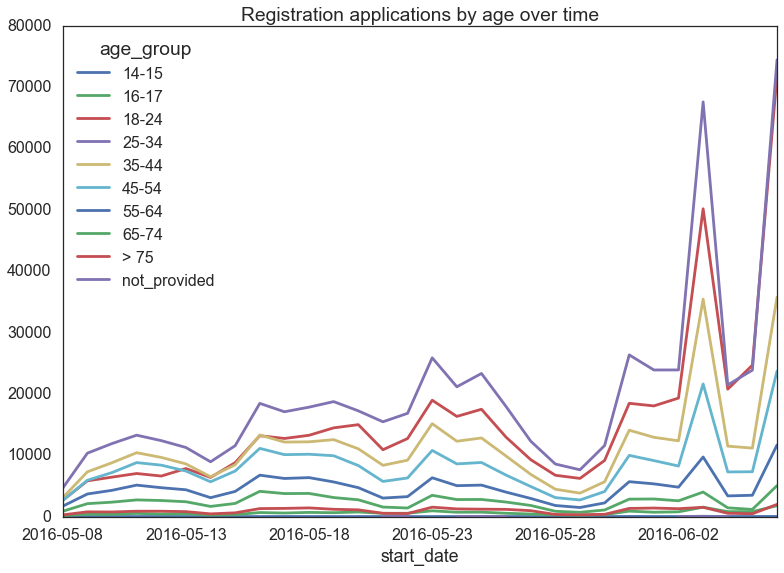

In [10]:
age_apps.plot(title='Registration applications by age over time');

## Cumulative applications over time

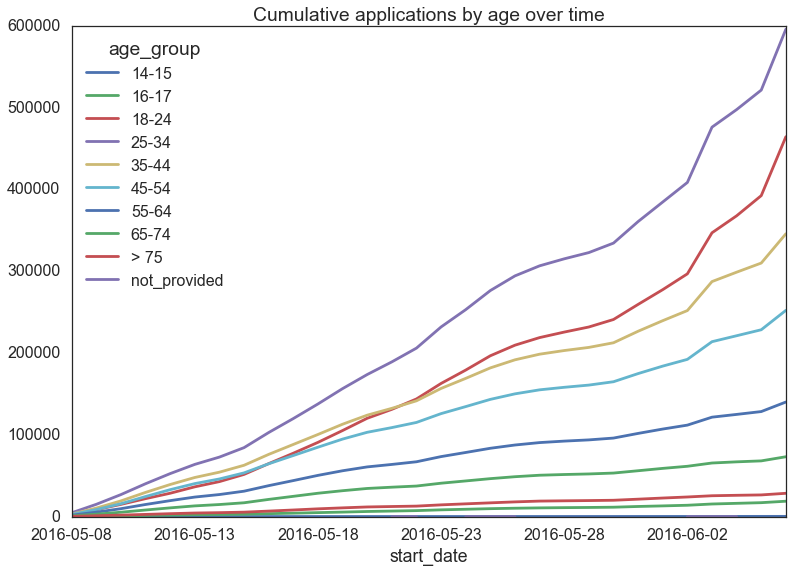

In [11]:
age_apps.cumsum().plot(title='Cumulative applications by age over time');

## Log applications by age over time

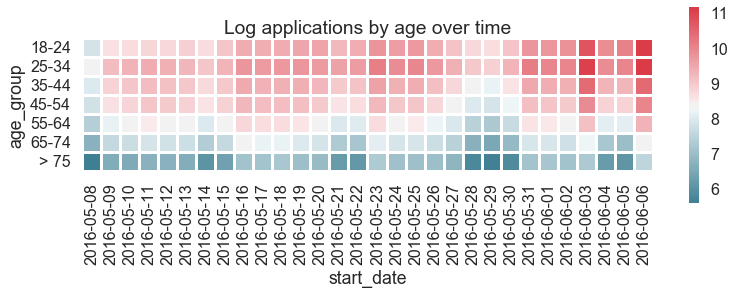

In [12]:
ax = sns.heatmap(
    age_apps.drop(labels=['14-15', '16-17', 'not_provided'], axis=1).apply(lambda s: np.log(s)).T, 
    cmap=cmap, 
    square=True,
    linewidths=2,
    cbar_kws={'shrink': 0.4},
)

ax.set_title('Log applications by age over time');

## Cumulative applications by age over time

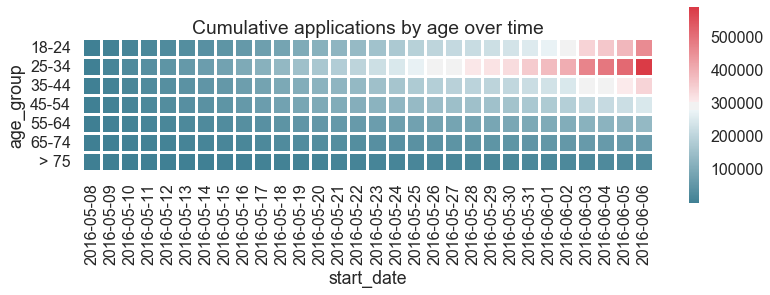

In [13]:
ax = sns.heatmap(
    age_apps.cumsum().drop(labels=['14-15', '16-17', 'not_provided'], axis=1).T, 
    cmap=cmap, 
    square=True,
    linewidths=2,
    cbar_kws={'shrink': 0.4},
)

ax.set_title('Cumulative applications by age over time');